# Employee Future Prediction

In [1]:
#import library
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## Data Extraction 

In [2]:
#load dataset
df_emp = pd.read_csv('Employee.csv')

In [3]:
#show head of dataset
df_emp.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


## Exploratory Data Analysis (EDA)

In [4]:
#check columns of dataset
df_emp.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [5]:
#describe of dataset
df_emp.describe(include = 'object')

,Education,City,Gender,EverBenched
count,4653,4653,4653,4653
unique,3,3,2,2
top,Bachelors,Bangalore,Male,No
freq,3601,2228,2778,4175


In [6]:
#check rows and columns of dataset
df_emp.shape

(4653, 9)

In [7]:
#check missing value
df_emp.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [8]:
#check type of dataset
df_emp.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [9]:
#check unique of education column
df_emp['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [10]:
#check number of education column
df_emp['Education'].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [11]:
#check unique of joining year column
df_emp['JoiningYear'].unique()

array([2017, 2013, 2014, 2016, 2015, 2012, 2018], dtype=int64)

In [12]:
#check number of joining year column
df_emp['JoiningYear'].value_counts()

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

In [13]:
#check unique of city column
df_emp['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [14]:
#check number of city column
df_emp['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

In [15]:
#check unique of payment tier column
df_emp['PaymentTier'].unique()

array([3, 1, 2], dtype=int64)

In [16]:
#check number of payment tier column
df_emp['PaymentTier'].value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

In [17]:
#check unique of age column
df_emp['Age'].unique()

array([34, 28, 38, 27, 24, 22, 23, 37, 32, 39, 29, 30, 36, 31, 25, 26, 40,
       35, 33, 41], dtype=int64)

In [18]:
#check number of age column
df_emp['Age'].value_counts()

26    645
28    630
27    625
25    418
24    385
29    230
30    220
37    141
36    139
38    136
34    136
40    134
32    132
39    131
31    125
33    124
35    123
41     82
22     49
23     48
Name: Age, dtype: int64

In [19]:
#check unique of gender column
df_emp['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
#check number of gender column
df_emp['Gender'].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

In [21]:
#check unique of ever benched column
df_emp['EverBenched'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
#check number of ever benched column
df_emp['EverBenched'].value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

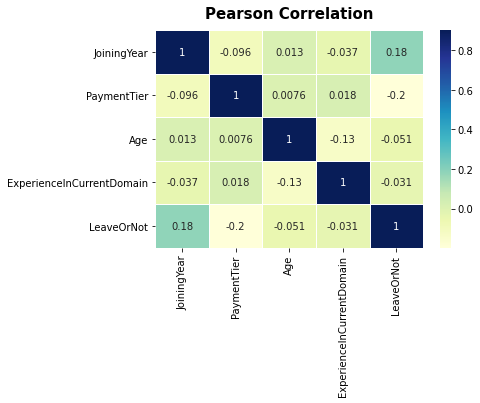

In [23]:
#check correlation of each variable
sns.heatmap(df_emp.corr(), linewidths = 0.9, annot = True, vmax = 0.9, cmap = 'YlGnBu')
plt.title('Pearson Correlation', fontsize = 15, pad = 12, fontweight = 'bold')
plt.show()

c:\users\bayu\opencv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


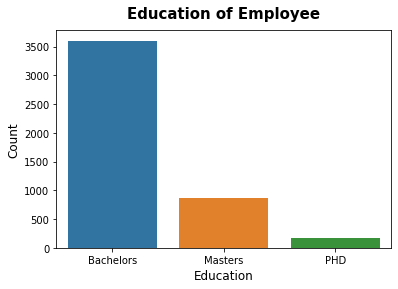

In [24]:
#visualize of employee's education
sns.countplot(df_emp['Education'])
plt.title('Education of Employee', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Education', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

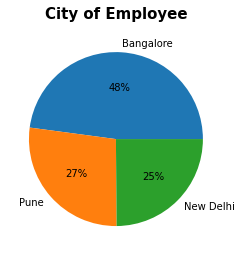

In [25]:
#visualize of employee's city
city = [np.count_nonzero(df_emp['City'] == 'Bangalore'),
       np.count_nonzero(df_emp['City'] == 'Pune'),
       np.count_nonzero(df_emp['City'] == 'New Delhi')]
activities = ['Bangalore', 'Pune', 'New Delhi']
plt.pie(city, labels = activities, autopct = '%1.f%%')
plt.title('City of Employee', fontsize = 15, pad = 12, fontweight = 'bold')
plt.show()

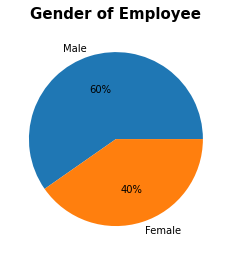

In [26]:
#visualize of employee's gender
gender = [np.count_nonzero(df_emp['Gender'] == 'Male'),
       np.count_nonzero(df_emp['Gender'] == 'Female')]
activities = ['Male', 'Female']
plt.pie(gender, labels = activities, autopct = '%1.f%%')
plt.title('Gender of Employee', fontsize = 15, pad = 12, fontweight = 'bold')
plt.show()

Maximum of Age:  41
Minimum of Age:  22
Median of Age:  28.0
Average of Age:  29.393294648613796


<AxesSubplot:>

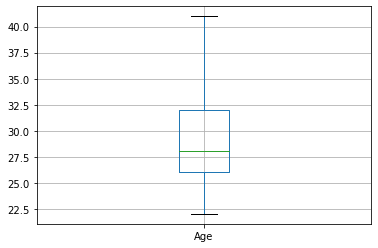

In [27]:
#check outlier
print('Maximum of Age: ', df_emp['Age'].max())
print('Minimum of Age: ', df_emp['Age'].min())
print('Median of Age: ', df_emp['Age'].median())
print('Average of Age: ', df_emp['Age'].mean())

#visualize of outlier
df_emp.boxplot(column = 'Age')

In [28]:
#analyze of employee's age under 28 based on education, gender, leave or not and city
df_emp[df_emp['Age'] < 28][['Education', 'City', 'Gender', 'Age', 'LeaveOrNot']]

,Education,City,Gender,Age,LeaveOrNot
3,Masters,Bangalore,Male,27,1
4,Masters,Pune,Male,24,1
5,Bachelors,Bangalore,Male,22,0
8,Bachelors,Pune,Male,23,0
10,Masters,Bangalore,Male,27,1
...,...,...,...,...,...
4635,Bachelors,Bangalore,Female,22,0
4638,Bachelors,Bangalore,Male,26,0
4646,Bachelors,Bangalore,Female,25,0
4648,Bachelors,Bangalore,Female,26,0


In [29]:
#analyze of employee's age over 28 based on education, gender, leave or not and city
df_emp[df_emp['Age'] > 28][['Education', 'City', 'Gender', 'Age', 'LeaveOrNot']]

,Education,City,Gender,Age,LeaveOrNot
0,Bachelors,Bangalore,Male,34,0
2,Bachelors,New Delhi,Female,38,0
6,Bachelors,New Delhi,Male,38,0
7,Bachelors,Bangalore,Female,34,1
9,Masters,New Delhi,Male,37,0
...,...,...,...,...,...
4645,Masters,Pune,Female,31,0
4647,Bachelors,Pune,Male,30,0
4649,Masters,Pune,Male,37,1
4651,Bachelors,Bangalore,Male,30,0


## Random Forest Model

In [30]:
#convert categorical data to numerical data
for i in df_emp[['Education', 'City', 'Gender', 'EverBenched']]:
    le = LabelEncoder()
    df_emp[i] = le.fit_transform(df_emp[i])
    
df_emp.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [31]:
#standarize of dataset
standard = StandardScaler()
standard.fit_transform(df_emp)

array([[-0.50773115,  1.03963837, -0.94273968, ..., -0.33836521,
        -1.86490139, -0.72393002],
       [-0.50773115, -1.10723275,  1.43287241, ..., -0.33836521,
         0.06055412,  1.38134898],
       [-0.50773115, -0.57051497,  0.24506637, ..., -0.33836521,
        -0.58126438, -0.72393002],
       ...,
       [ 1.41141834,  1.57635615,  0.24506637, ..., -0.33836521,
         1.34419112,  1.38134898],
       [-0.50773115, -1.64395053, -0.94273968, ...,  2.95538654,
        -0.58126438, -0.72393002],
       [-0.50773115, -0.03379719, -0.94273968, ...,  2.95538654,
         0.70237262, -0.72393002]])

In [32]:
#split data
X = df_emp.drop('LeaveOrNot', axis = 1)
y = df_emp['LeaveOrNot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3257, 8)
(3257,)
(1396, 8)
(1396,)


In [33]:
#build model
rf = RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
%time rf.fit(X_train, y_train)
print('Accuracy Score : ', rf.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 301 ms
Accuracy Score :  0.826647564469914


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [34]:
#calculate prediction probability
prob_train = np.squeeze(rf.predict_proba(X_train)[:, 1].reshape(1, -1))
prob_test = np.squeeze(rf.predict_proba(X_test)[:, 1].reshape(1, -1))
print('Probability of Training Set : \n', prob_train)
print('\nProbability of Testing Set : \n', prob_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Probability of Training Set : 
 [1.         0.17383929 0.         ... 0.         1.         0.03333333]

Probability of Testing Set : 
 [0.09318112 0.99       0.03483333 ... 0.02059524 0.18       0.        ]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [35]:
#false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)

#auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
print('Testing of Area Under the Curve (AUC) :', auc1)
print('Training of Area Under the Curve (AUC) :', auc2)

Testing of Area Under the Curve (AUC) : 0.8535940488938925
Training of Area Under the Curve (AUC) : 0.9813384504977275


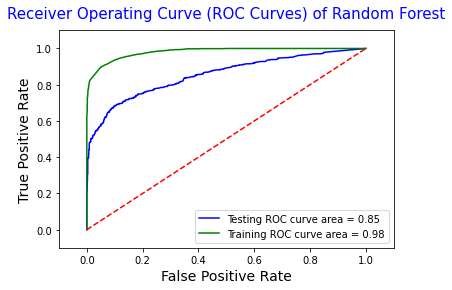

In [36]:
#plot auc 
plt.plot(fpr1, tpr1, color = 'blue', label = 'Testing ROC curve area = %0.2f' % auc1)
plt.plot(fpr2, tpr2, color = 'green', label = 'Training ROC curve area = %0.2f' % auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('Receiver Operating Curve (ROC Curves) of Random Forest', fontsize = 15, pad = 12, color = 'b')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.legend(loc = 'lower right')
plt.show() 

In [37]:
#prediction
y_pred = rf.predict(X_test)
print(y_pred)

[0 1 0 ... 0 0 0]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [38]:
#check of MSE & RMSE 
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.17335243553008595
Root Mean Squared Error : 0.4163561402574555


       Not  leave
Not    833     89
leave  153    321


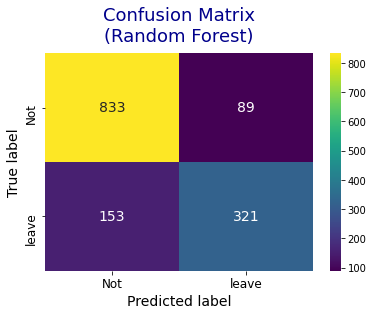

In [39]:
#confusion matrix
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Not', 'leave'), ('Not', 'leave'))
print(matrix)

#visualize confusion matrix
heatmap = sns.heatmap(matrix, annot = True, annot_kws = {'size': 14}, fmt = 'd', cmap = 'viridis')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)

plt.title('Confusion Matrix\n(Random Forest)', fontsize = 18, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [40]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print('Classification Report of Random Forest : \n')
print(report)

Classification Report of Random Forest : 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       922
           1       0.78      0.68      0.73       474

    accuracy                           0.83      1396
   macro avg       0.81      0.79      0.80      1396
weighted avg       0.82      0.83      0.82      1396



## Check Feature Importance 

In [41]:
#define of feature
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

JoiningYear                  0.328431
Age                          0.163789
City                         0.113360
PaymentTier                  0.100830
Gender                       0.095597
Education                    0.092952
ExperienceInCurrentDomain    0.086311
EverBenched                  0.018730
dtype: float64


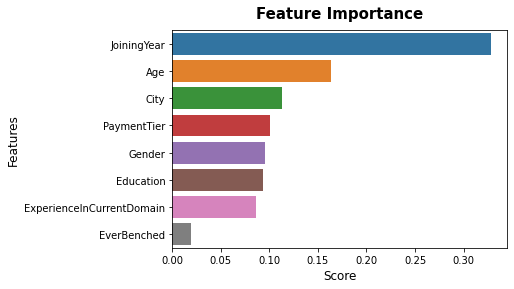

In [42]:
#visualize feature
sns.barplot(x = feature, y = feature.index)
plt.title('Feature Importance', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Score', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.show()

# Used Car Price

In [43]:
#import library
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%pylab inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


c:\users\bayu\opencv\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['matrix']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Data Extraction

In [44]:
#load x train and y train dataset
df_x_train = pd.read_csv('X_train.csv')
df_y_train = pd.read_csv('y_train.csv')

In [45]:
#show head of x train dataset
df_x_train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0


In [46]:
#show head of y train dataset
df_y_train.head()

,carID,price
0,13207,31995
1,17314,7700
2,12342,58990
3,13426,12999
4,16004,16990


In [47]:
#merge x train and y train dataset
merge = (df_x_train, df_y_train['price'])
df_car = pd.concat(merge, axis = True)
df_car.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990


## Exploratory Data Analysis (EDA)

In [48]:
#check columns of dataset
df_car.columns

Index(['carID', 'brand', 'model', 'year', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'price'],
      dtype='object')

In [49]:
#describe of dataset
df_car.describe(include = 'object')

,brand,model,transmission,fuelType
count,4960,4960,4960,4960
unique,9,90,4,5
top,merc,Arteon,Manual,Diesel
freq,790,167,1948,2989


In [50]:
#check rows and columns of dataset
df_car.shape

(4960, 11)

In [51]:
#check missing value
df_car.isnull().sum()

carID           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

In [52]:
#check type of dataset
df_car.dtypes

carID             int64
brand            object
model            object
year              int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
price             int64
dtype: object

In [53]:
#check unique of brand column
df_car['brand'].unique()

array(['hyundi', 'vauxhall', 'audi', 'vw', 'skoda', 'merc', 'toyota',
       'bmw', 'ford'], dtype=object)

In [54]:
#check number of brand column
df_car['brand'].value_counts()

merc        790
vw          768
ford        766
bmw         638
hyundi      511
toyota      446
skoda       425
audi        343
vauxhall    273
Name: brand, dtype: int64

In [55]:
#check unique of model column
df_car['model'].unique()

array([' Santa Fe', ' GTC', ' RS4', ' Scirocco', ' Scala', ' V Class',
       ' Prius', ' M4', ' Camry', ' KA', ' Vivaro', ' CLS Class',
       ' Caravelle', ' Arteon', ' Shuttle', ' I40', ' IX20', ' 6 Series',
       ' GL Class', ' S Class', ' S3', ' Yeti', ' Galaxy', ' Puma',
       ' Edge', ' A8', ' SLK', ' Kamiq', ' RS6', ' CLA Class',
       ' Land Cruiser', ' M Class', ' Q8', ' i3', ' Verso', ' Mustang',
       ' IX35', ' Amarok', ' Avensis', ' Grand Tourneo Connect',
       ' Antara', ' Tourneo Connect', ' Beetle', ' X4', ' CC', ' GT86',
       ' X-CLASS', ' I800', ' i8', ' Caddy Maxi Life', ' Combo Life',
       ' Rapid', ' SQ7', ' Grand C-MAX', ' Tourneo Custom', ' California',
       ' Agila', ' A7', ' Zafira Tourer', ' G Class', ' Tiguan Allspace',
       ' X6', ' M2', ' X7', ' 7 Series', ' Z4', ' RS5', ' Hilux',
       ' GLS Class', ' GLB Class', ' M5', ' RS3', ' Caddy Life', ' SQ5',
       ' Supra', ' 8 Series', ' Fusion', ' M6', ' M3', ' Jetta', ' S4',
       ' R8', ' PRO

In [56]:
#check number of model column
df_car['model'].value_counts()

 Arteon         167
 Grand C-MAX    164
 Scirocco       163
 Prius          154
 Santa Fe       150
               ... 
 Caddy            5
 Eos              5
 CLK              4
 Getz             4
 IQ               2
Name: model, Length: 90, dtype: int64

In [57]:
#check unique of year column
df_car['year'].unique()

array([2019, 2015, 2016, 2020, 2012, 2018, 2017, 2009, 2013, 2006, 2011,
       2014, 2008, 1997, 2001, 2010, 2005, 2004, 2007, 2000, 2003, 2002,
       1999, 1998], dtype=int64)

In [58]:
#check number of year column
df_car['year'].value_counts()

2019    1359
2017     816
2016     743
2018     534
2015     461
2020     337
2014     254
2013     181
2012      56
2011      51
2009      26
2010      25
2008      20
2007      18
2004      18
2006      15
2005      12
2003      10
2001       9
2002       6
1999       3
1998       2
1997       2
2000       2
Name: year, dtype: int64

In [59]:
#check unique of transmission column
df_car['transmission'].unique()

array(['Semi-Auto', 'Manual', 'Automatic', 'Other'], dtype=object)

In [60]:
#check number of transmission column
df_car['transmission'].value_counts()

Manual       1948
Automatic    1660
Semi-Auto    1351
Other           1
Name: transmission, dtype: int64

In [61]:
#check unique of fuel type column
df_car['fuelType'].unique()

array(['Diesel', 'Petrol', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [62]:
#check number of fuel type column
df_car['fuelType'].value_counts()

Diesel      2989
Petrol      1754
Hybrid       189
Other         26
Electric       2
Name: fuelType, dtype: int64

Maximum of mileage:  259000
Minimum of mileage:  1
Median of mileage:  19000.0
Average of mileage:  24956.28689516129
Total of mileage:  123783183


Maximum of tax:  580.0
Minimum of tax:  0.0
Median of tax:  145.0
Average of tax:  152.3326612903226
Total of tax:  755570.0


Maximum of mpg:  470.8
Minimum of mpg:  2.8
Median of mpg:  47.1
Average of mpg:  50.370766129032255
Total of mpg:  249839.0


Maximum of engine size:  6.6
Minimum of engine size:  0.0
Median of engine size:  2.0
Average of engine size:  2.124375
Total of engine size:  10536.9


Maximum of price:  145000
Minimum of price:  450
Median of price:  18999.0
Average of price:  23469.94375
Total of price:  116410921


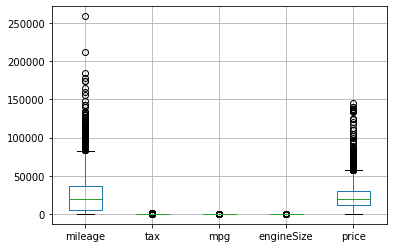

In [63]:
#set index of carID
df_car = df_car.set_index('carID')

#check outlier
print('Maximum of mileage: ', df_car['mileage'].max())
print('Minimum of mileage: ', df_car['mileage'].min())
print('Median of mileage: ', df_car['mileage'].median())
print('Average of mileage: ', df_car['mileage'].mean())
print('Total of mileage: ', df_car['mileage'].sum())
print('\n')
print('Maximum of tax: ', df_car['tax'].max())
print('Minimum of tax: ', df_car['tax'].min())
print('Median of tax: ', df_car['tax'].median())
print('Average of tax: ', df_car['tax'].mean())
print('Total of tax: ', df_car['tax'].sum())
print('\n')
print('Maximum of mpg: ', df_car['mpg'].max())
print('Minimum of mpg: ', df_car['mpg'].min())
print('Median of mpg: ', df_car['mpg'].median())
print('Average of mpg: ', df_car['mpg'].mean())
print('Total of mpg: ', df_car['mpg'].sum())
print('\n')
print('Maximum of engine size: ', df_car['engineSize'].max())
print('Minimum of engine size: ', df_car['engineSize'].min())
print('Median of engine size: ', df_car['engineSize'].median())
print('Average of engine size: ', df_car['engineSize'].mean())
print('Total of engine size: ', df_car['engineSize'].sum())
print('\n')
print('Maximum of price: ', df_car['price'].max())
print('Minimum of price: ', df_car['price'].min())
print('Median of price: ', df_car['price'].median())
print('Average of price: ', df_car['price'].mean())
print('Total of price: ', df_car['price'].sum())

#visualize outiler
df_car.boxplot(column = ['mileage', 'tax', 'mpg', 'engineSize',  'price'])
plt.show()

In [64]:
#analyze of mileage under 19000 based on brand, model, transmission and fuel type
df_car[df_car['mileage'] < 19000][['brand', 'model', 'transmission', 'fuelType', 'mileage']]

,brand,model,transmission,fuelType,mileage
carID,,,,,
13207,hyundi,Santa Fe,Semi-Auto,Diesel,4223
12342,audi,RS4,Automatic,Petrol,5151
16004,skoda,Scala,Semi-Auto,Petrol,3569
18964,merc,V Class,Automatic,Diesel,4170
17053,toyota,Prius,Automatic,Hybrid,3
...,...,...,...,...,...
14973,hyundi,Santa Fe,Semi-Auto,Diesel,30
13412,vw,Arteon,Manual,Diesel,7900
14104,toyota,Verso,Semi-Auto,Petrol,13913


In [65]:
#analyze of mileage over 19000 based on brand, model, transmission and fuel type
df_car[df_car['mileage'] > 19000][['brand', 'model', 'transmission', 'fuelType', 'mileage']]

,brand,model,transmission,fuelType,mileage
carID,,,,,
17314,vauxhall,GTC,Manual,Diesel,47870
13426,vw,Scirocco,Automatic,Diesel,20423
16726,ford,KA,Manual,Petrol,85843
17081,vauxhall,Vivaro,Manual,Diesel,40230
18995,merc,CLS Class,Automatic,Diesel,47156
...,...,...,...,...,...
12097,audi,A7,Semi-Auto,Diesel,37000
16898,merc,GL Class,Automatic,Diesel,24314
15453,vw,CC,Manual,Diesel,84932


In [66]:
#analyze of tax under 145 based on brand, model, transmission and fuel type
df_car[df_car['tax'] < 145][['brand', 'model', 'transmission', 'fuelType', 'tax']]

,brand,model,transmission,fuelType,tax
carID,,,,,
17314,vauxhall,GTC,Manual,Diesel,125.0
13426,vw,Scirocco,Automatic,Diesel,30.0
17053,toyota,Prius,Automatic,Hybrid,135.0
17429,toyota,Camry,Automatic,Hybrid,135.0
16726,ford,KA,Manual,Petrol,30.0
...,...,...,...,...,...
12932,hyundi,IX20,Manual,Petrol,125.0
18932,bmw,i3,Automatic,Hybrid,140.0
19468,toyota,Prius,Automatic,Hybrid,135.0


In [67]:
#analyze of tax over 145 based on brand, model, transmission and fuel type
df_car[df_car['tax'] > 145][['brand', 'model', 'transmission', 'fuelType', 'tax']]

,brand,model,transmission,fuelType,tax
carID,,,,,
17081,vauxhall,Vivaro,Manual,Diesel,160.0
17822,hyundi,IX20,Automatic,Petrol,200.0
12817,audi,S3,Manual,Petrol,205.0
13738,ford,Galaxy,Manual,Diesel,200.0
13105,ford,Edge,Manual,Diesel,160.0
...,...,...,...,...,...
13309,vw,Amarok,Manual,Diesel,260.0
14815,ford,Mustang,Manual,Petrol,260.0
17810,vauxhall,Zafira Tourer,Automatic,Petrol,235.0


In [68]:
#analyze of mpg under 47.1 based on brand, model, transmission and fuel type
df_car[df_car['mpg'] < 47.1][['brand', 'model', 'transmission', 'fuelType', 'mpg']]

,brand,model,transmission,fuelType,mpg
carID,,,,,
13207,hyundi,Santa Fe,Semi-Auto,Diesel,39.8
12342,audi,RS4,Automatic,Petrol,29.1
18964,merc,V Class,Automatic,Diesel,44.1
19021,bmw,M4,Semi-Auto,Petrol,34.0
13055,vw,Caravelle,Automatic,Diesel,33.6
...,...,...,...,...,...
12045,audi,RS5,Semi-Auto,Petrol,32.5
17810,vauxhall,Zafira Tourer,Automatic,Petrol,39.2
14043,skoda,Kamiq,Semi-Auto,Petrol,44.1


In [69]:
#analyze of mpg over 47.1 based on brand, model, transmission and fuel type
df_car[df_car['mpg'] > 47.1][['brand', 'model', 'transmission', 'fuelType', 'mpg']]

,brand,model,transmission,fuelType,mpg
carID,,,,,
17314,vauxhall,GTC,Manual,Diesel,60.1
13426,vw,Scirocco,Automatic,Diesel,57.6
17053,toyota,Prius,Automatic,Hybrid,64.2
17429,toyota,Camry,Automatic,Hybrid,52.3
16726,ford,KA,Manual,Petrol,57.7
...,...,...,...,...,...
16898,merc,GL Class,Automatic,Diesel,56.6
14416,bmw,6 Series,Automatic,Diesel,51.4
15453,vw,CC,Manual,Diesel,60.1


In [70]:
#analyze of engine size under 2 based on brand, model, transmission and fuel type
df_car[df_car['engineSize'] < 2][['brand', 'model', 'transmission', 'fuelType', 'engineSize']]

,brand,model,transmission,fuelType,engineSize
carID,,,,,
16004,skoda,Scala,Semi-Auto,Petrol,1.0
17053,toyota,Prius,Automatic,Hybrid,1.8
16726,ford,KA,Manual,Petrol,1.2
17081,vauxhall,Vivaro,Manual,Diesel,1.6
19049,hyundi,I40,Manual,Diesel,1.6
...,...,...,...,...,...
17810,vauxhall,Zafira Tourer,Automatic,Petrol,1.4
13943,ford,Grand Tourneo Connect,Manual,Diesel,1.5
14043,skoda,Kamiq,Semi-Auto,Petrol,1.5


In [71]:
#analyze of engine size over 2 based on brand, model, transmission and fuel type
df_car[df_car['engineSize'] > 2][['brand', 'model', 'transmission', 'fuelType', 'engineSize']]

,brand,model,transmission,fuelType,engineSize
carID,,,,,
13207,hyundi,Santa Fe,Semi-Auto,Diesel,2.2
12342,audi,RS4,Automatic,Petrol,2.9
18964,merc,V Class,Automatic,Diesel,2.1
19021,bmw,M4,Semi-Auto,Petrol,3.0
17429,toyota,Camry,Automatic,Hybrid,2.5
...,...,...,...,...,...
14973,hyundi,Santa Fe,Semi-Auto,Diesel,2.2
16898,merc,GL Class,Automatic,Diesel,2.1
14416,bmw,6 Series,Automatic,Diesel,3.0


In [72]:
#analyze of price under 18999 based on brand, model, transmission and fuel type
df_car[df_car['price'] < 18999][['brand', 'model', 'transmission', 'fuelType', 'price']]

,brand,model,transmission,fuelType,price
carID,,,,,
17314,vauxhall,GTC,Manual,Diesel,7700
13426,vw,Scirocco,Automatic,Diesel,12999
16004,skoda,Scala,Semi-Auto,Petrol,16990
16726,ford,KA,Manual,Petrol,3491
17081,vauxhall,Vivaro,Manual,Diesel,13750
...,...,...,...,...,...
14043,skoda,Kamiq,Semi-Auto,Petrol,18995
14104,toyota,Verso,Semi-Auto,Petrol,14995
16898,merc,GL Class,Automatic,Diesel,17999


In [73]:
#analyze of price over 18999 based on brand, model, transmission and fuel type
df_car[df_car['price'] > 18999][['brand', 'model', 'transmission', 'fuelType', 'price']]

,brand,model,transmission,fuelType,price
carID,,,,,
13207,hyundi,Santa Fe,Semi-Auto,Diesel,31995
12342,audi,RS4,Automatic,Petrol,58990
18964,merc,V Class,Automatic,Diesel,40890
17053,toyota,Prius,Automatic,Hybrid,25990
19021,bmw,M4,Semi-Auto,Petrol,41980
...,...,...,...,...,...
14973,hyundi,Santa Fe,Semi-Auto,Diesel,32995
13412,vw,Arteon,Manual,Diesel,24816
19468,toyota,Prius,Automatic,Hybrid,23490


In [74]:
#analyze total of price based on transmission, fuel type, year, brand and model
pd.pivot_table(df_car, index = ['transmission', 'fuelType', 'year', 'brand', 'model'], values = 'price',
              aggfunc = {'price' : np.sum}).sort_values('price', ascending = False)

price
transmission fuelType year brand    model             
Semi-Auto    Petrol   2019 bmw       M4        1468935
Automatic    Diesel   2019 merc      V Class   1437431
Semi-Auto    Diesel   2019 hyundi    Santa Fe  1287810
                           bmw       X4        1174146
Automatic    Diesel   2019 vw        Amarok    1109458
...                                                ...
Manual       Petrol   2004 vauxhall  Agila        1395
                      2003 vw        Beetle       1300
Automatic    Petrol   2007 toyota    Avensis      1200
Manual       Petrol   2002 hyundi    Santa Fe     1200
                      2003 vauxhall  Agila         450

[1126 rows x 1 columns]

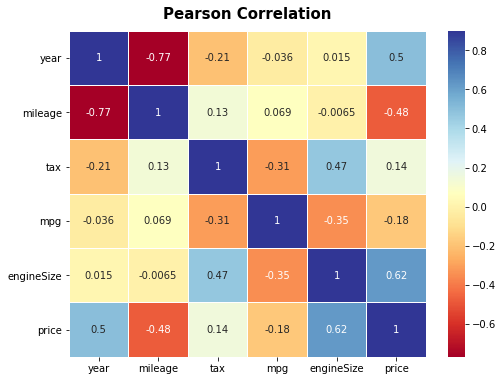

In [75]:
#check correlation of each variabel
plt.figure(figsize = (8,6))
sns.heatmap(df_car.corr(), annot = True, linewidths = 0.9, vmax = 0.9, cmap = 'RdYlBu')
plt.title('Pearson Correlation', fontsize = 15, pad = 12, fontweight = 'bold')
plt.show()

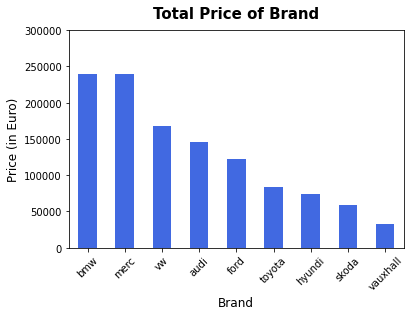

In [76]:
#visualize brand based on total price
chart = df_car.groupby('brand')['price'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'royalblue')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Total Price of Brand', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Brand', fontsize = 12)
plt.ylabel('Price (in Euro)', fontsize = 12)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100).astype(int))
plt.show()

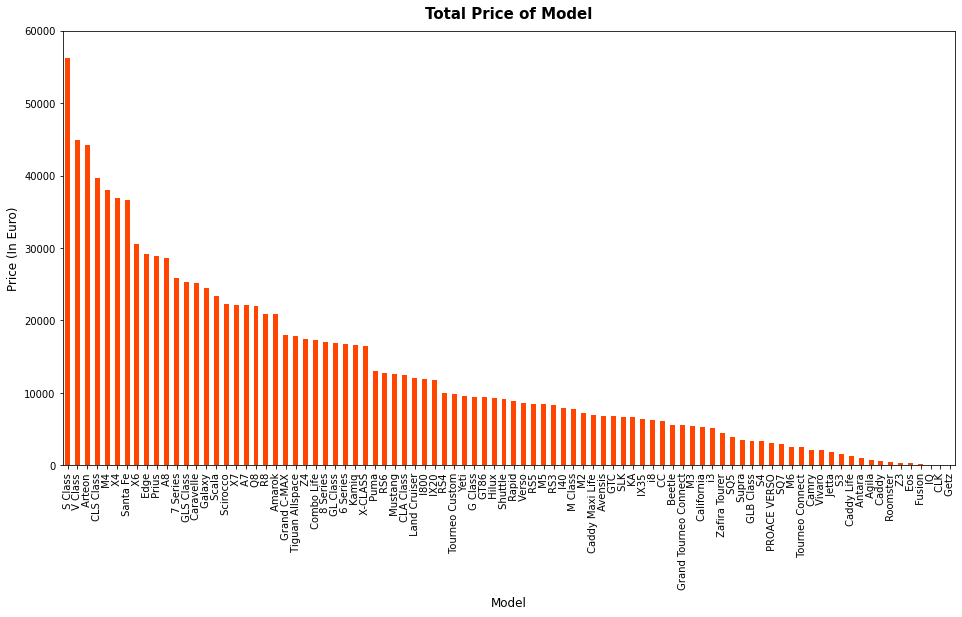

In [77]:
#visualize model based on total price
plt.figure(figsize = (16,8))
df_car.groupby('model')['price'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'orangered')
plt.title('Total Price of Model', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Model', fontsize = 12)
plt.ylabel('Price (In Euro)', fontsize = 12)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100).astype(int))
plt.show()

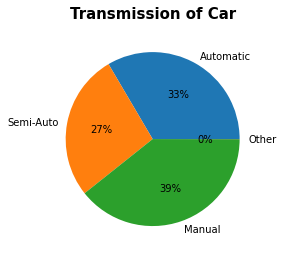

In [78]:
#visualize transmission of car
transmission = [np.count_nonzero(df_car['transmission'] == 'Automatic'),
               np.count_nonzero(df_car['transmission'] == 'Semi-Auto'),
               np.count_nonzero(df_car['transmission'] == 'Manual'),
               np.count_nonzero(df_car['transmission'] == 'Other')]
activities = ['Automatic', 'Semi-Auto', 'Manual', 'Other']
plt.pie(transmission, labels = activities, autopct = '%1.f%%')
plt.title('Transmission of Car', fontsize = 15, pad = 12, fontweight = 'bold')
plt.show()

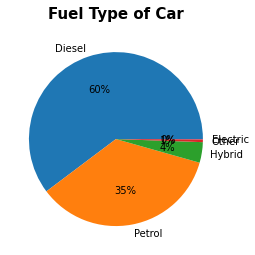

In [79]:
#visualize fuel type of car
fuel_type = [np.count_nonzero(df_car['fuelType'] == 'Diesel'),
            np.count_nonzero(df_car['fuelType'] == 'Petrol'),
            np.count_nonzero(df_car['fuelType'] == 'Hybrid'),
            np.count_nonzero(df_car['fuelType'] == 'Other'),
            np.count_nonzero(df_car['fuelType'] == 'Electric')]
activities = ['Diesel', 'Petrol', 'Hybrid', 'Other', 'Electric']
plt.pie(fuel_type, labels = activities, autopct = '%1.f%%')
plt.title('Fuel Type of Car', fontsize = 15, pad = 12, fontweight = 'bold')
plt.show()

c:\users\bayu\opencv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


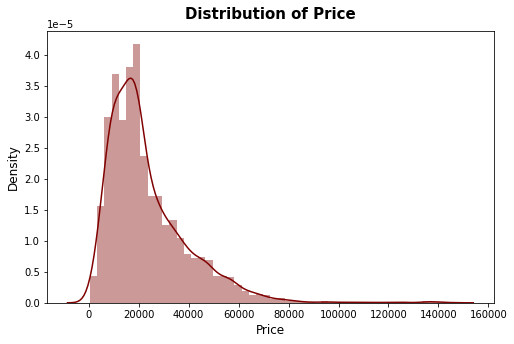

In [80]:
#distribution of price
plt.figure(figsize = (8,5))
sns.distplot(df_car['price'], color = 'maroon')
plt.title('Distribution of Price', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.show()

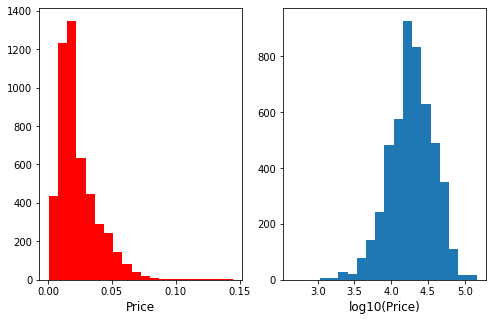

In [81]:
#transform distribution to normal distribution
figure(figsize = (8,5))
subplot(1,2,1)
hist(df_car['price'] * 1e-6, 20, color = 'r');
xlabel('Price', fontsize = 12)
subplot(1, 2, 2)
hist(log10(df_car['price']), 20);
xlabel('log10(Price)', fontsize = 12)
plt.show()

## Linear Regression Model

In [82]:
#convert categorical data into dummies variable
df_car = pd.get_dummies(df_car, drop_first = True)
df_car.head()

,year,mileage,tax,mpg,engineSize,price,brand_bmw,brand_ford,brand_hyundi,brand_merc,...,model_ Zafira Tourer,model_ i3,model_ i8,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
carID,,,,,,,,,,,,,,,,,,,,,
13207,2019,4223,145.0,39.8,2.2,31995,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
17314,2015,47870,125.0,60.1,2.0,7700,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12342,2019,5151,145.0,29.1,2.9,58990,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13426,2016,20423,30.0,57.6,2.0,12999,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16004,2020,3569,145.0,47.1,1.0,16990,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [83]:
#normalize of training set and testing set
scaler = MinMaxScaler()
scaler.fit_transform(df_car)

array([[0.95652174, 0.01630122, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.7826087 , 0.18482311, 0.21551724, ..., 0.        , 0.        ,
        0.        ],
       [0.95652174, 0.01988425, 0.25      , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.7826087 , 0.32792019, 0.05172414, ..., 0.        , 0.        ,
        0.        ],
       [0.86956522, 0.11640585, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.15532492, 0.25862069, ..., 0.        , 0.        ,
        0.        ]])

In [84]:
#split data 
X = df_car.drop('price', axis = 1)
y = df_car['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3472, 109)
(3472,)
(1488, 109)
(1488,)


In [85]:
#build model
lr = LinearRegression()
%time lr.fit(X_train, y_train)
print('Accuracy Score :', lr.score(X_test, y_test))

Wall time: 64.2 ms
Accuracy Score : 0.8825425781405718


In [86]:
#prediction
y_pred = lr.predict(X_test)
print(y_pred)

[26268.20317806 25289.1861617  68384.53941608 ...  7104.97508877
  4201.42033153 -1784.47432429]


In [87]:
#check of MAE, MSE & RMSE 
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error : '+ str(mae))
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Absolute Error : 3554.839161447512
Mean Squared Error : 32717909.357950065
Root Mean Squared Error : 5719.957111548133


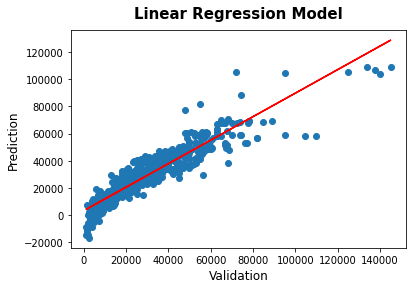

In [88]:
#visualize model
x = y_test
y = y_pred

plt.title('Linear Regression Model', fontsize = 15, pad = 12, fontweight = 'bold')
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'r')
plt.xlabel('Validation', fontsize = 12)
plt.ylabel('Prediction', fontsize = 12)
plt.show()

## Check Feature Importance 

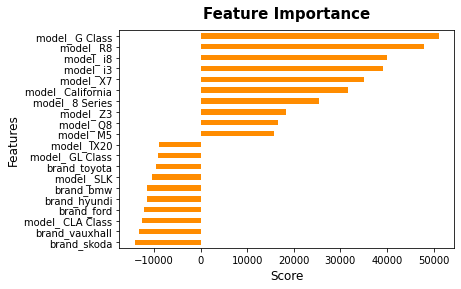

In [89]:
#define of feature
coef = pd.Series(lr.coef_, index = X.columns)

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

#visualize feature
imp_coef.plot(kind = 'barh', color = 'darkorange')
plt.title('Feature Importance', fontsize = 15, pad = 12, fontweight = 'bold')
plt.xlabel('Score', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.show()